## Random Forest Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("./weatherAUS_cleaned.csv", index_col="Date")
df_melb = df[df.Location == "Melbourne"].copy().drop(columns=["Location"])
df_melb.head()

In [ ]:
# shift dataframes to make supervisable
def shift_ts_data(df, n_train_days=1, n_pred_days=1):
    df_temp = df.copy()
    cols = list()
    for i in range(n_train_days, 0, -1):
        cols.append(df_temp.shift(i))
    for i in range(0, n_pred_days):
        cols.append(df_temp.shift(-i))
    agg = pd.concat(cols, axis=1)
    return agg.values

In [ ]:
# Make prediction for single value
def train_rf(train, pred_idx):
    train = np.asarray(train)
    X, y = np.delete(train, pred_idx, 1), train[:, pred_idx]
    model = RandomForestRegressor(n_estimators=800)
    model.fit(X, y)
    return model

# Run model on dataset
def validate_rf(data, test_size=None, pred_idx=-1):
    if test_size is None:
        test_size = 0
    if type(test_size) is float:
        test_size = min(int(len(data) * test_size), len(data))

    train, test = data[:-test_size, :], data[-test_size:, :]
    testX, testY = np.delete(test, pred_idx, 1), test[:, pred_idx]

    prev_samples = train.tolist()
    predictions = list()
    
    model = train_rf(train, pred_idx)
    for i in range(test_size):
        X, y = testX[i], testY[i]
        y_hat = model.predict([X])[0]

        predictions.append(y_hat)
        prev_samples.append(test[i])
        #print("===={}% done====".format(i * 100 / test_size))

    MSE = mean_squared_error(test[:, pred_idx], predictions)
    return MSE, test[:, pred_idx], predictions

In [46]:
shift_melb = shift_ts_data(df_melb, n_train_days=2, n_pred_days=2)
shift_melb = shift_melb[~np.isnan(shift_melb).any(axis=1)]

MSE, y, y_hat = validate_rf(shift_melb, 365, -8) #4,7,8

====0.0% done====
====0.273972602739726% done====
====0.547945205479452% done====
====0.821917808219178% done====
====1.095890410958904% done====
====1.36986301369863% done====
====1.643835616438356% done====
====1.917808219178082% done====
====2.191780821917808% done====
====2.4657534246575343% done====
====2.73972602739726% done====
====3.0136986301369864% done====
====3.287671232876712% done====
====3.5616438356164384% done====
====3.835616438356164% done====
====4.109589041095891% done====
====4.383561643835616% done====
====4.657534246575342% done====
====4.931506849315069% done====
====5.205479452054795% done====
====5.47945205479452% done====
====5.7534246575342465% done====
====6.027397260273973% done====
====6.301369863013699% done====
====6.575342465753424% done====
====6.8493150684931505% done====
====7.123287671232877% done====
====7.397260273972603% done====
====7.671232876712328% done====
====7.945205479452055% done====
====8.219178082191782% done====
====8.49315068493150

MSE: 11.895


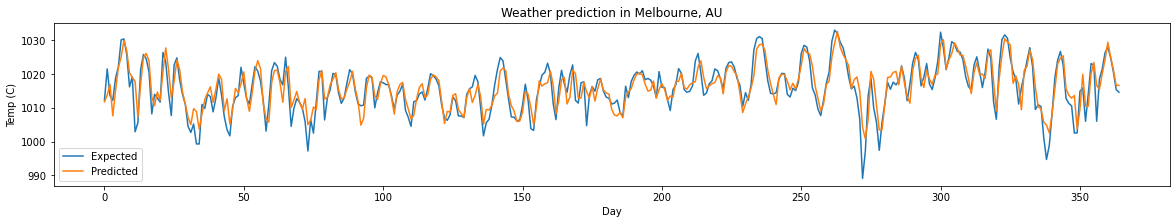

In [47]:
print('MSE: %.3f' % MSE)
plt.rcParams["figure.figsize"] = (20,3)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(y_hat, label='Predicted')
plt.legend()
plt.xlabel("Day")
plt.ylabel("Temp (C)")
plt.title("Weather prediction in Melbourne, AU")
plt.show()

In [48]:
shift_melb[0]

array([ 9.50000000e+00,  1.54000000e+01,  2.00000000e+00,  1.20000000e+01,
        6.30000000e+01,  1.20000000e+01,  3.70000000e+01,  6.00000000e+01,
        1.00680000e+03,  1.10000000e+01,  1.00000000e+00,  6.00000000e-01,
        0.00000000e+00,  1.00000000e+00, -3.78142176e+01,  1.44963161e+02,
        1.10000000e+01,  1.45000000e+01,  6.00000000e-01,  1.20000000e+01,
        6.30000000e+01,  1.20000000e+01,  3.00000000e+01,  6.60000000e+01,
        1.01340000e+03,  1.18000000e+01,  0.00000000e+00,  1.40000000e+00,
        1.00000000e+00,  1.00000000e+00, -3.78142176e+01,  1.44963161e+02,
        8.40000000e+00,  1.41000000e+01,  1.40000000e+00,  1.20000000e+01,
        3.90000000e+01,  1.20000000e+01,  1.70000000e+01,  7.20000000e+01,
        1.02480000e+03,  1.06000000e+01,  1.00000000e+00,  6.00000000e-01,
        0.00000000e+00,  1.00000000e+00, -3.78142176e+01,  1.44963161e+02,
        9.10000000e+00,  1.45000000e+01,  6.00000000e-01,  4.00000000e+00,
        1.90000000e+01,  

In [49]:
print(shift_melb.shape)

(9369, 64)
